In [62]:
#https://notes.quantecon.org/submission/5cc8e7dd4174bb001a39a8ff
import statsmodels as sm
#https://www.statsmodels.org/dev/vector_ar.html
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
sns.set()
import datetime as dt
import warnings
warnings.simplefilter('ignore')
from sklearn import (linear_model, metrics, neural_network, pipeline, preprocessing, model_selection)

In [63]:
#https://stackoverflow.com/questions/20681297/vector-autoregressive-model-fitting-with-scikit-learn
#https://www.analyticsvidhya.com/blog/2021/08/vector-autoregressive-model-in-python/
#https://blog.devgenius.io/implementing-vector-autoregression-from-scratch-with-python-b12eedbf35ad
#https://notes.quantecon.org/submission/5cc8e7dd4174bb001a39a8ff

#Bayesian VAR
#https://github.com/joergrieger/pybvar

In [64]:
#RMSE loss function

In [65]:
train_df = pd.read_csv('/Users/aashrit/Documents/Masters/MY498/Data/Time Series/twitter_reddit_time_series_copy3.csv')
train_df = train_df.set_index('date')
#train = train.iloc[20:,:]
train_df

,overall_sentiment_score_20d_lag,overall_attention_score_20d_lag,BEIR,interest_rate_1yr_lag,commodities_1yr_lag,UNRATENSA_1yr_lag,UMCSENT_2wk_lag,WM2NS_1yr_lag,gdp_1yr_lag,USDEUR_1yr_lag
date,,,,,,,,,,
01/06/2021,26.4459,3.900597,2.460,0.05,99.875276,11.2,82.9,17915.4,19477.444,1.224100
02/06/2021,51.3641,2.348224,2.440,0.06,99.875276,11.2,82.9,17915.4,19477.444,1.221300
03/06/2021,48.4431,1.156789,2.420,0.06,99.875276,11.2,82.9,17915.4,19477.444,1.212200
04/06/2021,17.4456,0.903695,2.400,0.06,99.875276,11.2,82.9,17915.4,19477.444,1.217300
05/06/2021,28.1433,0.947890,2.400,0.07,99.875276,11.2,82.9,17915.4,19477.444,1.216933
...,...,...,...,...,...,...,...,...,...,...
27/05/2022,-56.0960,2.735565,2.630,0.06,155.100579,5.5,58.4,20235.1,22740.959,1.070900
28/05/2022,-4.0143,1.563207,2.630,0.05,155.100579,5.5,58.4,20235.1,22740.959,1.069733
29/05/2022,1.4806,3.380288,2.630,0.05,155.100579,5.5,58.4,20235.1,22740.959,1.071044


In [6]:
X_train = train_df.drop(['BEIR'],axis=1)
y_train = train_df['BEIR']
X_test = train_df.drop(['BEIR'],axis=1)
y_test = train_df['BEIR']

In [7]:
#train_df = train.iloc[:,4:]
train_df

,overall_sentiment_score_20d_lag,overall_attention_score_20d_lag,BEIR,interest_rate_1yr_lag,commodities_1yr_lag,UNRATENSA_1yr_lag,UMCSENT_2wk_lag,WM2NS_1yr_lag,gdp_1yr_lag,USDEUR_1yr_lag
date,,,,,,,,,,
01/06/2021,26.4459,3.900597,2.460,0.05,99.875276,11.2,82.9,17915.4,19477.444,1.224100
02/06/2021,51.3641,2.348224,2.440,0.06,99.875276,11.2,82.9,17915.4,19477.444,1.221300
03/06/2021,48.4431,1.156789,2.420,0.06,99.875276,11.2,82.9,17915.4,19477.444,1.212200
04/06/2021,17.4456,0.903695,2.400,0.06,99.875276,11.2,82.9,17915.4,19477.444,1.217300
05/06/2021,28.1433,0.947890,2.400,0.07,99.875276,11.2,82.9,17915.4,19477.444,1.216933
...,...,...,...,...,...,...,...,...,...,...
27/05/2022,-56.0960,2.735565,2.630,0.06,155.100579,5.5,58.4,20235.1,22740.959,1.070900
28/05/2022,-4.0143,1.563207,2.630,0.05,155.100579,5.5,58.4,20235.1,22740.959,1.069733
29/05/2022,1.4806,3.380288,2.630,0.05,155.100579,5.5,58.4,20235.1,22740.959,1.071044


In [8]:
#https://www.machinelearningplus.com/time-series/vector-autoregression-examples-python/

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Import Statsmodels
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from statsmodels.tools.eval_measures import rmse, aic

In [10]:
#Visualising time series

In [11]:
#Granger causality test

In [12]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(train_df, variables = train_df.columns)  

,overall_sentiment_score_20d_lag_x,overall_attention_score_20d_lag_x,BEIR_x,interest_rate_1yr_lag_x,commodities_1yr_lag_x,UNRATENSA_1yr_lag_x,UMCSENT_2wk_lag_x,WM2NS_1yr_lag_x,gdp_1yr_lag_x,USDEUR_1yr_lag_x
overall_sentiment_score_20d_lag_y,1.0000,0.0000,0.0001,0.0003,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
overall_attention_score_20d_lag_y,0.0021,1.0000,0.0001,0.0000,0.0000,0.0000,0.0000,0.0000,0.0001,0.0000
BEIR_y,0.0227,0.0356,1.0000,0.2165,0.1209,0.0434,0.0020,0.0525,0.0704,0.0575
interest_rate_1yr_lag_y,0.0003,0.2591,0.0053,1.0000,0.0000,0.0004,0.0000,0.0000,0.0000,0.0000
commodities_1yr_lag_y,0.5139,0.0001,0.2413,0.2642,1.0000,0.4093,0.7968,0.0083,0.6282,0.0151
UNRATENSA_1yr_lag_y,0.5040,0.6916,0.4411,0.0425,0.8691,1.0000,0.2437,0.0375,0.2335,0.4836
UMCSENT_2wk_lag_y,0.0228,0.0088,0.2582,0.9392,0.0240,0.0204,1.0000,0.0461,0.0108,0.0425
WM2NS_1yr_lag_y,0.0093,0.0000,0.0458,0.1279,0.0206,0.0061,0.0018,1.0000,0.0004,0.3534
gdp_1yr_lag_y,0.8600,0.0014,0.1724,0.0109,0.0654,0.6144,0.3670,0.0074,1.0000,0.0119
USDEUR_1yr_lag_y,0.0913,0.0312,0.0308,0.1072,0.0361,0.2170,0.2927,0.0002,0.2348,1.0000


In [13]:
#Cointegration test

In [14]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(train_df)
#cointegration_test(df)

Name   ::  Test Stat > C(95%)    =>   Signif  
 ----------------------------------------
overall_sentiment_score_20d_lag ::  230.56    > 219.4051  =>   True
overall_attention_score_20d_lag ::  172.15    > 179.5199  =>   False
BEIR   ::  131.76    > 143.6691  =>   False
interest_rate_1yr_lag ::  97.1      > 111.7797  =>   False
commodities_1yr_lag ::  70.52     > 83.9383   =>   False
UNRATENSA_1yr_lag ::  47.87     > 60.0627   =>   False
UMCSENT_2wk_lag ::  30.21     > 40.1749   =>   False
WM2NS_1yr_lag ::  17.1      > 24.2761   =>   False
gdp_1yr_lag ::  7.91      > 12.3212   =>   False
USDEUR_1yr_lag ::  1.4       > 4.1296    =>   False


In [15]:
#Train test split

In [16]:
nobs = 31
df_train, df_test = train_df[0:-nobs], train_df[-nobs:]

In [66]:
df_train
df_test

,overall_sentiment_score_20d_lag,overall_attention_score_20d_lag,BEIR,interest_rate_1yr_lag,commodities_1yr_lag,UNRATENSA_1yr_lag,UMCSENT_2wk_lag,WM2NS_1yr_lag,gdp_1yr_lag,USDEUR_1yr_lag
date,,,,,,,,,,
01/05/2022,1.7979,2.171184,2.880,0.05,155.100579,5.5,65.2,20150.2,22740.959,1.052189
02/05/2022,11.3230,9.070342,2.810,0.05,155.100579,5.5,65.2,20150.2,22740.959,1.052100
03/05/2022,-17.5748,7.017218,2.830,0.06,155.100579,5.5,65.2,20275.5,22740.959,1.053200
04/05/2022,-1.6031,4.326948,2.860,0.06,155.100579,5.5,65.2,20275.5,22740.959,1.053900
05/05/2022,16.8282,3.289849,2.870,0.06,155.100579,5.5,65.2,20275.5,22740.959,1.050700
06/05/2022,-6.9053,2.312886,2.860,0.06,155.100579,5.5,65.2,20275.5,22740.959,1.057200
07/05/2022,-4.9242,1.637116,2.860,0.06,155.100579,5.5,65.2,20275.5,22740.959,1.053933
08/05/2022,14.0925,2.516328,2.860,0.06,155.100579,5.5,65.2,20275.5,22740.959,1.053944
09/05/2022,28.9857,2.359621,2.750,0.06,155.100579,5.5,65.2,20275.5,22740.959,1.055900


In [67]:
#Stationarity test

In [68]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    print(f' Significance Level    = {signif}')
    print(f' Test Statistic        = {output["test_statistic"]}')
    print(f' No. Lags Chosen       = {output["n_lags"]}')

    for key,val in r[4].items():
        print(f' Critical value {adjust(key)} = {round(val, 3)}')
    if p_value <= signif:
        print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.")

In [69]:
for name, column in df_train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')
    #print(name, column)

    Augmented Dickey-Fuller Test on "overall_sentiment_score_20d_lag" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -3.0226
 No. Lags Chosen       = 9
 Critical value 1%     = -3.451
 Critical value 5%     = -2.871
 Critical value 10%    = -2.572
 => P-Value = 0.0328. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "overall_attention_score_20d_lag" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -2.6919
 No. Lags Chosen       = 12
 Critical value 1%     = -3.451
 Critical value 5%     = -2.871
 Critical value 10%    = -2.572
 => P-Value = 0.0754. Weak evidence to reject the Null Hypothesis.
 => Series is Non-Stationary.


    Augmented Dickey-Fuller Test on "BEIR" 
    -----------------------------------------------
 

In [70]:
train_df_differenced = df_train.diff().dropna()

In [71]:
for name, column in train_df_differenced.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "overall_sentiment_score_20d_lag" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -8.8918
 No. Lags Chosen       = 9
 Critical value 1%     = -3.451
 Critical value 5%     = -2.871
 Critical value 10%    = -2.572
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "overall_attention_score_20d_lag" 
    -----------------------------------------------
 Null Hypothesis: Data has unit root. Non-Stationary.
 Significance Level    = 0.05
 Test Statistic        = -7.8068
 No. Lags Chosen       = 11
 Critical value 1%     = -3.451
 Critical value 5%     = -2.871
 Critical value 10%    = -2.572
 => P-Value = 0.0. Rejecting Null Hypothesis.
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "BEIR" 
    -----------------------------------------------
 Null Hypothesis: Data has un

In [72]:
df_train

,overall_sentiment_score_20d_lag,overall_attention_score_20d_lag,BEIR,interest_rate_1yr_lag,commodities_1yr_lag,UNRATENSA_1yr_lag,UMCSENT_2wk_lag,WM2NS_1yr_lag,gdp_1yr_lag,USDEUR_1yr_lag
date,,,,,,,,,,
01/06/2021,26.4459,3.900597,2.46,0.05,99.875276,11.2,82.9,17915.4,19477.444,1.224100
02/06/2021,51.3641,2.348224,2.44,0.06,99.875276,11.2,82.9,17915.4,19477.444,1.221300
03/06/2021,48.4431,1.156789,2.42,0.06,99.875276,11.2,82.9,17915.4,19477.444,1.212200
04/06/2021,17.4456,0.903695,2.40,0.06,99.875276,11.2,82.9,17915.4,19477.444,1.217300
05/06/2021,28.1433,0.947890,2.40,0.07,99.875276,11.2,82.9,17915.4,19477.444,1.216933
...,...,...,...,...,...,...,...,...,...,...
26/04/2022,27.5878,2.004162,2.85,0.07,145.041207,5.7,65.2,20150.2,22740.959,1.066100
27/04/2022,21.1544,1.617477,2.88,0.07,145.041207,5.7,65.2,20150.2,22740.959,1.054900
28/04/2022,17.5450,1.453405,2.97,0.07,145.041207,5.7,65.2,20150.2,22740.959,1.050000


In [73]:
train_df_differenced

,overall_sentiment_score_20d_lag,overall_attention_score_20d_lag,BEIR,interest_rate_1yr_lag,commodities_1yr_lag,UNRATENSA_1yr_lag,UMCSENT_2wk_lag,WM2NS_1yr_lag,gdp_1yr_lag,USDEUR_1yr_lag
date,,,,,,,,,,
02/06/2021,24.9182,-1.552373,-0.02,0.01,0.0,0.0,0.0,0.0,0.0,-0.002800
03/06/2021,-2.9210,-1.191435,-0.02,0.00,0.0,0.0,0.0,0.0,0.0,-0.009100
04/06/2021,-30.9975,-0.253094,-0.02,0.00,0.0,0.0,0.0,0.0,0.0,0.005100
05/06/2021,10.6977,0.044196,0.00,0.01,0.0,0.0,0.0,0.0,0.0,-0.000367
06/06/2021,30.6460,-0.248359,0.00,0.00,0.0,0.0,0.0,0.0,0.0,-0.001456
...,...,...,...,...,...,...,...,...,...,...
26/04/2022,22.7377,0.614587,-0.06,0.00,0.0,0.0,0.0,-153.6,0.0,-0.004200
27/04/2022,-6.4334,-0.386685,0.03,0.00,0.0,0.0,0.0,0.0,0.0,-0.011200
28/04/2022,-3.6094,-0.164072,0.09,0.00,0.0,0.0,0.0,0.0,0.0,-0.004900


In [25]:
def plot_vars(data, levels, color, leveltype, name):
    
    """
    Displays historical trends of VAR variables
    And see if it's sensible to just select levels instead of differences
    """
    
    fig, ax = plt.subplots(1, 2, figsize=(12,2.5), sharex=True)
    
    palettes = ["blue", "green", "red", "orange", "purple", "black"]
    
    for col, i in dict(zip(levels, list(range(3)))).items():
        data[col].plot(ax=ax[i], legend=True, linewidth=1.0, color=color, sharex=True)     
    
    plt.xticks(rotation=45)
    #fig.xlabel
    fig.set_facecolor("floralwhite")
    fig.savefig(name, bbox_inches='tight')
    fig.suptitle(f"Historical trends of VAR {leveltype} variables", 
                 fontsize=14, fontweight="bold", fontname="Verdana")

In [26]:
#train_df_differenced.columns

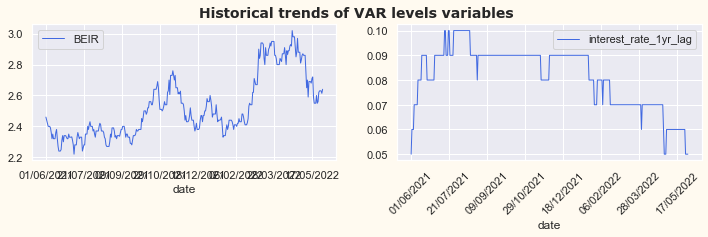

In [27]:
plot_vars(train_df, levels = ['BEIR', 'interest_rate_1yr_lag'], color="royalblue", leveltype="levels", name='levels1')

In [28]:
def plot_vars(data, levels, color, leveltype, name):
    
    """
    Displays historical trends of VAR variables
    And see if it's sensible to just select levels instead of differences
    """
    
    fig, ax = plt.subplots(1, 2, figsize=(12,2.5), sharex=True)
    
    palettes = ["blue", "green", "red", "orange", "purple", "black"]
    
    for col, i in dict(zip(levels, list(range(3)))).items():
        data[col].plot(ax=ax[i], legend=True, linewidth=1.0, color=color, sharex=True)     
    
    plt.xticks(rotation=45)
    #fig.xlabel
    fig.set_facecolor("floralwhite")
    fig.savefig(name, bbox_inches='tight')

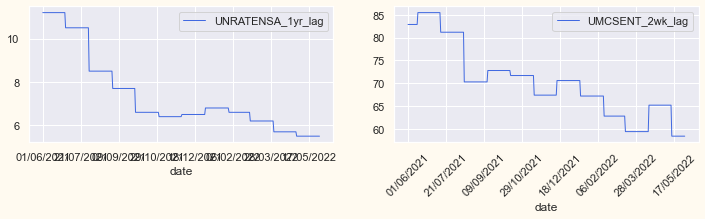

In [29]:
plot_vars(train_df, levels = ['UNRATENSA_1yr_lag', 'UMCSENT_2wk_lag'], color="royalblue", leveltype="levels", name='levels2')

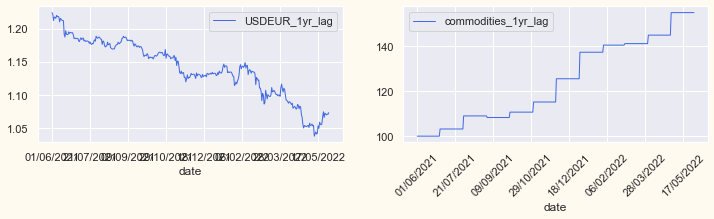

In [30]:
plot_vars(train_df, levels = ['USDEUR_1yr_lag', 'commodities_1yr_lag'], color="royalblue", leveltype="levels", name='levels3')

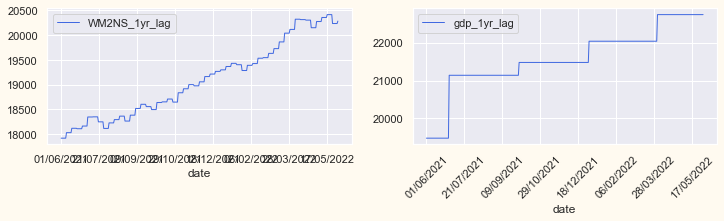

In [31]:
plot_vars(train_df, levels = ['WM2NS_1yr_lag', 'gdp_1yr_lag'], color="royalblue", leveltype="levels", name='levels4')

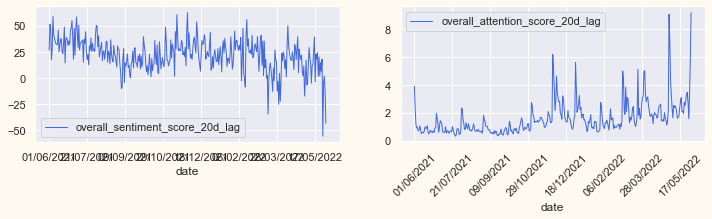

In [32]:
plot_vars(train_df, levels = ['overall_sentiment_score_20d_lag', 'overall_attention_score_20d_lag'], color="royalblue", leveltype="levels", name='levels5')

In [33]:
def plot_vars(data, levels, color, leveltype, name):
    
    """
    Displays historical trends of VAR variables
    And see if it's sensible to just select levels instead of differences
    """
    
    fig, ax = plt.subplots(1, 2, figsize=(12,2.5), sharex=True)
    
    palettes = ["blue", "green", "red", "orange", "purple", "black"]
    
    for col, i in dict(zip(levels, list(range(3)))).items():
        data[col].plot(ax=ax[i], legend=True, linewidth=1.0, color=color, sharex=True)     
    
    plt.xticks(rotation=45)
    #fig.xlabel
    fig.set_facecolor("floralwhite")
    fig.savefig(name, bbox_inches='tight')
    fig.suptitle(f"Historical trends of VAR {leveltype} variables", 
                 fontsize=14, fontweight="bold", fontname="Verdana")

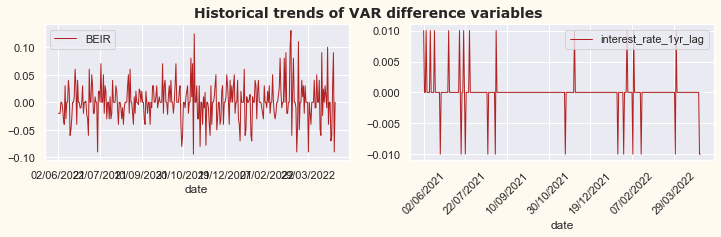

In [34]:
plot_vars(train_df_differenced, levels = ['BEIR', 'interest_rate_1yr_lag'], color="firebrick", leveltype="difference", name='difference1')

In [35]:
def plot_vars(data, levels, color, leveltype, name):
    
    """
    Displays historical trends of VAR variables
    And see if it's sensible to just select levels instead of differences
    """
    
    fig, ax = plt.subplots(1, 2, figsize=(12,2.5), sharex=True)
    
    palettes = ["blue", "green", "red", "orange", "purple", "black"]
    
    for col, i in dict(zip(levels, list(range(3)))).items():
        data[col].plot(ax=ax[i], legend=True, linewidth=1.0, color=color, sharex=True)     
    
    plt.xticks(rotation=45)
    #fig.xlabel
    fig.set_facecolor("floralwhite")
    fig.savefig(name, bbox_inches='tight')

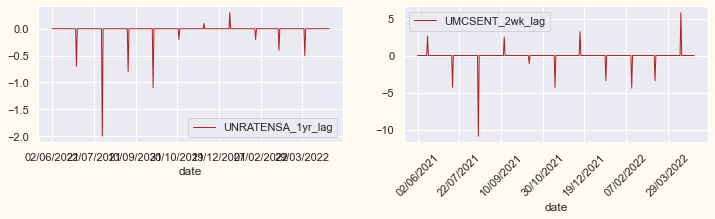

In [36]:
plot_vars(train_df_differenced, levels = ['UNRATENSA_1yr_lag', 'UMCSENT_2wk_lag'], color="firebrick", leveltype="difference", name='difference2')

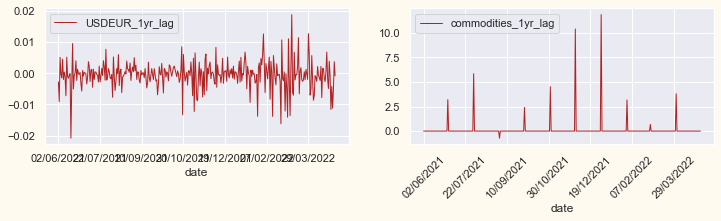

In [37]:
plot_vars(train_df_differenced, levels = ['USDEUR_1yr_lag', 'commodities_1yr_lag'], color="firebrick", leveltype="difference", name='difference3')

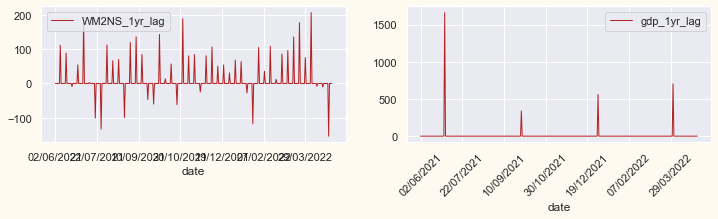

In [38]:
plot_vars(train_df_differenced, levels = ['WM2NS_1yr_lag', 'gdp_1yr_lag'], color="firebrick", leveltype="difference", name='difference4')

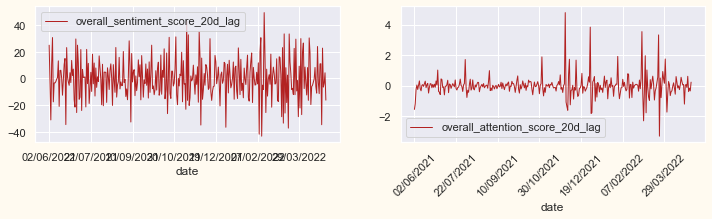

In [39]:
plot_vars(train_df_differenced, levels = ['overall_sentiment_score_20d_lag', 'overall_attention_score_20d_lag'], color="firebrick", leveltype="difference", name='difference5')

In [74]:
#Selecting appropriate lag
train_df_differenced

,overall_sentiment_score_20d_lag,overall_attention_score_20d_lag,BEIR,interest_rate_1yr_lag,commodities_1yr_lag,UNRATENSA_1yr_lag,UMCSENT_2wk_lag,WM2NS_1yr_lag,gdp_1yr_lag,USDEUR_1yr_lag
date,,,,,,,,,,
02/06/2021,24.9182,-1.552373,-0.02,0.01,0.0,0.0,0.0,0.0,0.0,-0.002800
03/06/2021,-2.9210,-1.191435,-0.02,0.00,0.0,0.0,0.0,0.0,0.0,-0.009100
04/06/2021,-30.9975,-0.253094,-0.02,0.00,0.0,0.0,0.0,0.0,0.0,0.005100
05/06/2021,10.6977,0.044196,0.00,0.01,0.0,0.0,0.0,0.0,0.0,-0.000367
06/06/2021,30.6460,-0.248359,0.00,0.00,0.0,0.0,0.0,0.0,0.0,-0.001456
...,...,...,...,...,...,...,...,...,...,...
26/04/2022,22.7377,0.614587,-0.06,0.00,0.0,0.0,0.0,-153.6,0.0,-0.004200
27/04/2022,-6.4334,-0.386685,0.03,0.00,0.0,0.0,0.0,0.0,0.0,-0.011200
28/04/2022,-3.6094,-0.164072,0.09,0.00,0.0,0.0,0.0,0.0,0.0,-0.004900


In [75]:
model = VAR(train_df_differenced)
for i in [1,2,3,4,5,6,7,8,9]:
    result = model.fit(i)
    print('Lag Order =', i)
    print('AIC : ', result.aic)
    print('BIC : ', result.bic)
    print('FPE : ', result.fpe)
    print('HQIC: ', result.hqic, '\n')
    
#Almost all criteria hit minimum at 1 lag

Lag Order = 1
AIC :  -12.644240467618356
BIC :  -11.383502977917109
FPE :  3.226870326338791e-06
HQIC:  -12.141459050827512 

Lag Order = 2
AIC :  -12.50051924693315
BIC :  -10.08829912962444
FPE :  3.7310806753695033e-06
HQIC:  -11.538423485720244 

Lag Order = 3
AIC :  -12.246414821207953
BIC :  -8.677570206411701
FPE :  4.829059399474911e-06
HQIC:  -10.82285449034244 

Lag Order = 4
AIC :  -12.032710572983525
BIC :  -7.3020610963458275
FPE :  6.024436958861325e-06
HQIC:  -10.145519234341121 

Lag Order = 5
AIC :  -11.869524490397659
BIC :  -5.971850891995484
FPE :  7.180844244566479e-06
HQIC:  -9.516519325628186 

Lag Order = 6
AIC :  -11.522832836243097
BIC :  -4.452876554141188
FPE :  1.034890979124396e-05
HQIC:  -8.701814477253928 

Lag Order = 7
AIC :  -11.218758154582964
BIC :  -2.9712209129560865
FPE :  1.440609726017392e-05
HQIC:  -7.9275105118037 

Lag Order = 8
AIC :  -10.835965018653653
BIC :  -1.4055084103856927
FPE :  2.190641459422841e-05
HQIC:  -7.072255107047045 

Lag

In [76]:
model_fitted = model.fit(1)
model_fitted.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Fri, 12, Aug, 2022
Time:                     15:29:55
--------------------------------------------------------------------
No. of Equations:         10.0000    BIC:                   -11.3835
Nobs:                     332.000    HQIC:                  -12.1415
Log likelihood:          -2501.93    FPE:                3.22687e-06
AIC:                     -12.6442    Det(Omega_mle):     2.32928e-06
--------------------------------------------------------------------
Results for equation overall_sentiment_score_20d_lag
                                        coefficient       std. error           t-stat            prob
-----------------------------------------------------------------------------------------------------
const                                     -0.106947         0.792066           -0.135           0.893
L1.overall_sentiment_score_20d_lag        -0.393939 

In [77]:
#Checking for serial correlation#
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fitted.resid)

for col, val in zip(train_df_differenced.columns, out):
    print(str(col), ':', round(val, 2))

overall_sentiment_score_20d_lag : 2.23
overall_attention_score_20d_lag : 2.08
BEIR : 2.0
interest_rate_1yr_lag : 1.98
commodities_1yr_lag : 2.06
UNRATENSA_1yr_lag : 2.01
UMCSENT_2wk_lag : 2.01
WM2NS_1yr_lag : 2.03
gdp_1yr_lag : 2.02
USDEUR_1yr_lag : 2.1


In [78]:
# Get the lag order
lag_order = model_fitted.k_ar
print(lag_order)  #> 4

# Input data for forecasting
forecast_input = train_df_differenced.values[-lag_order:]
forecast_input

1


array([[-1.6188000e+01,  2.3070916e-01,  0.0000000e+00, -1.0000000e-02,
         0.0000000e+00,  0.0000000e+00,  0.0000000e+00,  0.0000000e+00,
         0.0000000e+00, -8.3333000e-04]])

In [79]:
df_train

,overall_sentiment_score_20d_lag,overall_attention_score_20d_lag,BEIR,interest_rate_1yr_lag,commodities_1yr_lag,UNRATENSA_1yr_lag,UMCSENT_2wk_lag,WM2NS_1yr_lag,gdp_1yr_lag,USDEUR_1yr_lag
date,,,,,,,,,,
01/06/2021,26.4459,3.900597,2.46,0.05,99.875276,11.2,82.9,17915.4,19477.444,1.224100
02/06/2021,51.3641,2.348224,2.44,0.06,99.875276,11.2,82.9,17915.4,19477.444,1.221300
03/06/2021,48.4431,1.156789,2.42,0.06,99.875276,11.2,82.9,17915.4,19477.444,1.212200
04/06/2021,17.4456,0.903695,2.40,0.06,99.875276,11.2,82.9,17915.4,19477.444,1.217300
05/06/2021,28.1433,0.947890,2.40,0.07,99.875276,11.2,82.9,17915.4,19477.444,1.216933
...,...,...,...,...,...,...,...,...,...,...
26/04/2022,27.5878,2.004162,2.85,0.07,145.041207,5.7,65.2,20150.2,22740.959,1.066100
27/04/2022,21.1544,1.617477,2.88,0.07,145.041207,5.7,65.2,20150.2,22740.959,1.054900
28/04/2022,17.5450,1.453405,2.97,0.07,145.041207,5.7,65.2,20150.2,22740.959,1.050000


In [45]:
# Forecast
fc = model_fitted.forecast(y=forecast_input, steps=nobs)
df_forecast = pd.DataFrame(fc, index=df_train.index[-nobs:], columns=df_train.columns + '_1d')
df_forecast

,overall_sentiment_score_20d_lag_1d,overall_attention_score_20d_lag_1d,BEIR_1d,interest_rate_1yr_lag_1d,commodities_1yr_lag_1d,UNRATENSA_1yr_lag_1d,UMCSENT_2wk_lag_1d,WM2NS_1yr_lag_1d,gdp_1yr_lag_1d,USDEUR_1yr_lag_1d
date,,,,,,,,,,
31/03/2022,4.000774,-0.088615,0.011347,0.000374,-0.032500,-0.036633,-0.068735,8.021233,40.535313,0.000014
01/04/2022,-1.360462,0.032180,-0.001146,0.000232,0.110938,-0.015290,-0.061618,6.217979,6.362118,-0.000590
02/04/2022,0.294340,-0.018224,0.001697,-0.000096,0.152348,-0.016074,-0.052505,6.648622,9.801090,-0.000487
03/04/2022,-0.230382,0.001229,0.001318,-0.000013,0.130529,-0.016853,-0.053465,6.801283,10.079172,-0.000518
04/04/2022,-0.074460,-0.005393,0.001383,-0.000030,0.136888,-0.016681,-0.053236,6.745846,9.995633,-0.000500
05/04/2022,-0.117485,-0.003311,0.001358,-0.000025,0.135088,-0.016689,-0.053467,6.751805,9.975842,-0.000506
06/04/2022,-0.105938,-0.003917,0.001367,-0.000027,0.135638,-0.016692,-0.053364,6.752348,9.988619,-0.000505
07/04/2022,-0.109099,-0.003749,0.001365,-0.000026,0.135473,-0.016692,-0.053393,6.752163,9.985499,-0.000505
08/04/2022,-0.108207,-0.003795,0.001365,-0.000026,0.135519,-0.016692,-0.053386,6.752142,9.986019,-0.000505


In [46]:
def invert_transformation(df_train, df_forecast, second_diff=False):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = df_forecast.copy()
    columns = df_train.columns
    for col in columns:        
        # Roll back 2nd Diff
        if second_diff:
            df_fc[str(col)+'_1d'] = (df_train[col].iloc[-1]-df_train[col].iloc[-2]) + df_fc[str(col)+'_2d'].cumsum()
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = df_train[col].iloc[-1] + df_fc[str(col)+'_1d'].cumsum()
    return df_fc

In [47]:
df_results = invert_transformation(df_train, df_forecast, second_diff=False)

In [48]:
df_results
#.iloc[:,6:]

,overall_sentiment_score_20d_lag_1d,overall_attention_score_20d_lag_1d,BEIR_1d,interest_rate_1yr_lag_1d,commodities_1yr_lag_1d,UNRATENSA_1yr_lag_1d,UMCSENT_2wk_lag_1d,WM2NS_1yr_lag_1d,gdp_1yr_lag_1d,USDEUR_1yr_lag_1d,overall_sentiment_score_20d_lag_forecast,overall_attention_score_20d_lag_forecast,BEIR_forecast,interest_rate_1yr_lag_forecast,commodities_1yr_lag_forecast,UNRATENSA_1yr_lag_forecast,UMCSENT_2wk_lag_forecast,WM2NS_1yr_lag_forecast,gdp_1yr_lag_forecast,USDEUR_1yr_lag_forecast
date,,,,,,,,,,,,,,,,,,,,
31/03/2022,4.000774,-0.088615,0.011347,0.000374,-0.032500,-0.036633,-0.068735,8.021233,40.535313,0.000014,9.632174,1.254132,2.891347,0.050374,145.008707,5.663367,65.131265,20158.221233,22781.494313,1.052881
01/04/2022,-1.360462,0.032180,-0.001146,0.000232,0.110938,-0.015290,-0.061618,6.217979,6.362118,-0.000590,8.271712,1.286313,2.890202,0.050606,145.119645,5.648078,65.069647,20164.439212,22787.856431,1.052291
02/04/2022,0.294340,-0.018224,0.001697,-0.000096,0.152348,-0.016074,-0.052505,6.648622,9.801090,-0.000487,8.566053,1.268089,2.891899,0.050509,145.271994,5.632004,65.017142,20171.087833,22797.657521,1.051805
03/04/2022,-0.230382,0.001229,0.001318,-0.000013,0.130529,-0.016853,-0.053465,6.801283,10.079172,-0.000518,8.335671,1.269318,2.893217,0.050496,145.402523,5.615152,64.963677,20177.889116,22807.736693,1.051287
04/04/2022,-0.074460,-0.005393,0.001383,-0.000030,0.136888,-0.016681,-0.053236,6.745846,9.995633,-0.000500,8.261211,1.263925,2.894601,0.050466,145.539410,5.598470,64.910441,20184.634962,22817.732327,1.050787
05/04/2022,-0.117485,-0.003311,0.001358,-0.000025,0.135088,-0.016689,-0.053467,6.751805,9.975842,-0.000506,8.143725,1.260614,2.895959,0.050441,145.674498,5.581781,64.856974,20191.386767,22827.708169,1.050281
06/04/2022,-0.105938,-0.003917,0.001367,-0.000027,0.135638,-0.016692,-0.053364,6.752348,9.988619,-0.000505,8.037787,1.256697,2.897326,0.050414,145.810136,5.565089,64.803610,20198.139115,22837.696788,1.049776
07/04/2022,-0.109099,-0.003749,0.001365,-0.000026,0.135473,-0.016692,-0.053393,6.752163,9.985499,-0.000505,7.928688,1.252947,2.898691,0.050388,145.945609,5.548397,64.750217,20204.891278,22847.682287,1.049271
08/04/2022,-0.108207,-0.003795,0.001365,-0.000026,0.135519,-0.016692,-0.053386,6.752142,9.986019,-0.000505,7.820480,1.249152,2.900056,0.050362,146.081128,5.531705,64.696831,20211.643420,22857.668306,1.048766


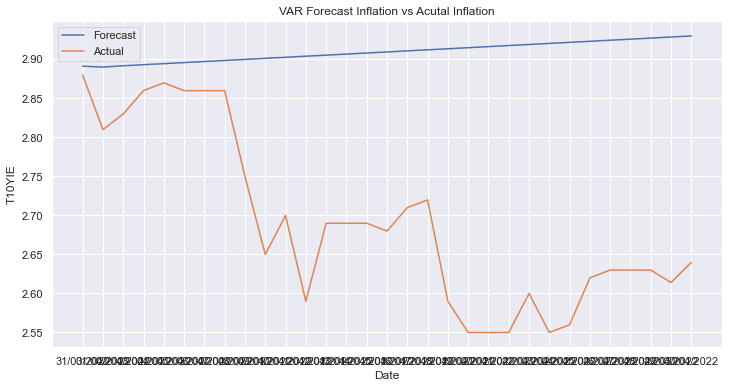

In [49]:
#Sentiment same plot
plt.figure(figsize=(12,6))
plt.plot(df_results.index, df_results['BEIR_forecast'], label = "Forecast")
# plotting the line 2 points 
plt.plot(df_results.index, df_test['BEIR'], label = "Actual")
plt.xlabel('Date')
# Set the y axis label of the current axis.
plt.ylabel('T10YIE')
# Set a title of the current axes.
plt.title('VAR Forecast Inflation vs Acutal Inflation')
plt.savefig('var_trad_forecast.png')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

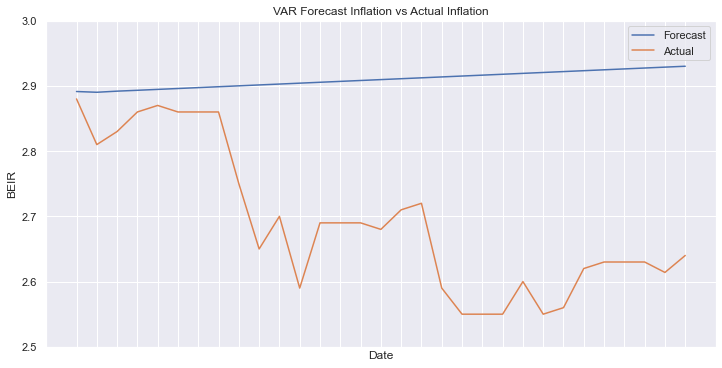

In [50]:
plt.figure(figsize=(12,6))
plt.plot(df_results.index, df_results['BEIR_forecast'], label = "Forecast")
# plotting the line 2 points 
plt.plot(df_results.index, df_test['BEIR'], label = "Actual")
plt.xlabel('Date')
# Set the y axis label of the current axis.
plt.ylabel('BEIR')
# Set a title of the current axes.
plt.title('VAR Forecast Inflation vs Actual Inflation')
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off
plt.ylim(2.5,3)
# show a legend on the plot
plt.legend()
plt.savefig('var_forecast.png')
# Display a figure.
plt.show()

In [51]:
def train_test_plot(model, X_train, X_test, name):
    """
    This will plot the actual values of CPI against the one fitted by the model
    We train the model until 2009 and then use it from 2009 onwards on the test features dataset
    """
    fig, ax = plt.subplots(figsize=(12,6))
    colors = sns.color_palette("deep", 8)
    plt.ylim(2.5,3)
    
    yvalues = pd.DataFrame(y_test)
    
    forecasted = list(model.predict(X_test)) # Use the model fit on features data from 2009 onwards
    df_fcast = pd.DataFrame({"date": list(yvalues.index), "BEIR_fcast": forecasted})
    df_fcast = df_fcast.set_index("date")
    
    df = pd.merge(yvalues, df_fcast, left_index=True, right_index=True)

    df["BEIR_fcast"].plot(ax=ax, legend=True, linewidth=2.5, linestyle="dashed", color="forestgreen") # CPI fitted
    df["BEIR"].plot(ax=ax, legend=True, linewidth=1.5, linestyle="solid", color="salmon") # Actual CPI values
    
    ax.set_title("BEIR vs. Model's BEIR")
    ax.set_ylabel("BEIR")
    ax.legend(["Forecasted BEIR","Actual BEIR"])
    plt.savefig(name)

In [52]:
df_results['BEIR_forecast']

date
31/03/2022    2.891347
01/04/2022    2.890202
02/04/2022    2.891899
03/04/2022    2.893217
04/04/2022    2.894601
05/04/2022    2.895959
06/04/2022    2.897326
07/04/2022    2.898691
08/04/2022    2.900056
09/04/2022    2.901422
10/04/2022    2.902787
11/04/2022    2.904152
12/04/2022    2.905517
13/04/2022    2.906883
14/04/2022    2.908248
15/04/2022    2.909613
16/04/2022    2.910978
17/04/2022    2.912344
18/04/2022    2.913709
19/04/2022    2.915074
20/04/2022    2.916439
21/04/2022    2.917805
22/04/2022    2.919170
23/04/2022    2.920535
24/04/2022    2.921900
25/04/2022    2.923266
26/04/2022    2.924631
27/04/2022    2.925996
28/04/2022    2.927361
29/04/2022    2.928726
30/04/2022    2.930092
Name: BEIR_forecast, dtype: float64

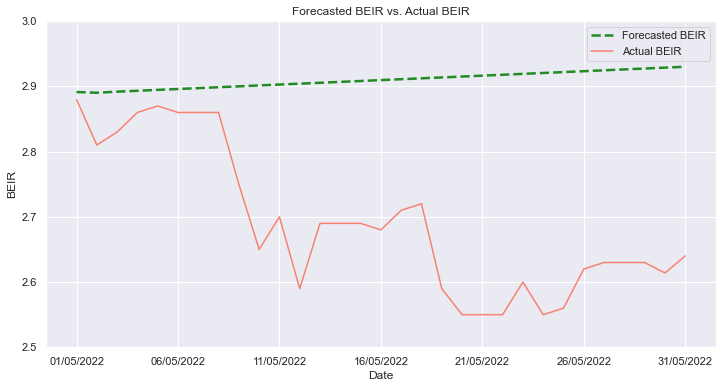

In [60]:
fig, ax = plt.subplots(figsize=(12,6))
colors = sns.color_palette("deep", 8)
plt.ylim(2.5,3)
    
yvalues = pd.DataFrame(y_test)
    
df_results['BEIR_forecast'].plot(ax=ax, legend=True, linewidth=2.5, linestyle="dashed", color="forestgreen") # CPI fitted
df_test["BEIR"].plot(ax=ax, legend=True, linewidth=1.5, linestyle="solid", color="salmon") # Actual CPI values
    
ax.set_title("Forecasted BEIR vs. Actual BEIR")
ax.set_ylabel("BEIR")
ax.set_xlabel("Date")
ax.legend(["Forecasted BEIR","Actual BEIR"])
plt.savefig('var_forecast.png')

In [54]:
from sklearn import (linear_model, metrics, neural_network, pipeline, preprocessing, model_selection)

In [55]:
#Forecast MSE
metrics.mean_squared_error(df_results['BEIR_forecast'], df_test['BEIR'], squared = False)

0.2494406292031177

In [56]:
rmse = metrics.mean_squared_error(df_results['BEIR_forecast'], df_test['BEIR'], squared = False)
error = (rmse/np.mean(df_test['BEIR']))*100
error
#We see that the RMSE is quite low compared to the mean (9.3% of the size of the mean overall), 
#which means that XGBoost did quite a good job at predicting the values of the test set. 

9.270217835491223

In [57]:
df_results['BEIR_forecast']

date
31/03/2022    2.891347
01/04/2022    2.890202
02/04/2022    2.891899
03/04/2022    2.893217
04/04/2022    2.894601
05/04/2022    2.895959
06/04/2022    2.897326
07/04/2022    2.898691
08/04/2022    2.900056
09/04/2022    2.901422
10/04/2022    2.902787
11/04/2022    2.904152
12/04/2022    2.905517
13/04/2022    2.906883
14/04/2022    2.908248
15/04/2022    2.909613
16/04/2022    2.910978
17/04/2022    2.912344
18/04/2022    2.913709
19/04/2022    2.915074
20/04/2022    2.916439
21/04/2022    2.917805
22/04/2022    2.919170
23/04/2022    2.920535
24/04/2022    2.921900
25/04/2022    2.923266
26/04/2022    2.924631
27/04/2022    2.925996
28/04/2022    2.927361
29/04/2022    2.928726
30/04/2022    2.930092
Name: BEIR_forecast, dtype: float64